
# Project: Investigate a Dataset - [Gapminder World]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
      <li><a href="#conclusion 1">Conclusion 1</a></li>
      <li><a href="#conclusion 2">Conclusion 2</a></li>
      <li><a href="#conclusion 3">Conclusion 3</a></li>
      <li><a href="#conclusion 4">Conclusion 4</a></li>
    </ul>
<li><a href="#conclusions">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This project will look at datasets representing different indicators for 197 countries over the course of roughly 3 centuries. 
Each indicator has its own table, with a column that holds all the countries and a column for each year the indicator is measured.

>**Population table:** shows the population of each country over the years 1800 to 2100

>**GDP/capita, inflation-adjusted table:** shows the gross domestic product per person adjusted for differences in purchasing power (in international dollars)

>**Life expectancy:** the average number of years a child is sexpected to live given no changes in current mortality patterns

>**Children per Woman:** the total fertility rate; the number of children born from each woman considering their current, age-specific fertility rate 

### Questions for Analysis

>1 - How is income related to population?

>2 - How is income related to life expectancy?

>3 - How do the chosen regions compare on the same indicator?

>4 - How do these 4 indicators relate together for each region?

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
df_pop = pd.read_csv('population_total.csv')
df_fertility = pd.read_csv('children_per_woman_total_fertility.csv')
df_gdp = pd.read_csv('gdp_capita.csv')
df_life_exp = pd.read_csv('life_expectancy.csv')

### Checking the datatypes and shapes of all tables

>Must have information in float dtype (except 'country' column) to be able to graph it later, and

>Must have the same countries and range of years to be able to compare all datasets together 

In [3]:
df_pop.head()
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Columns: 302 entries, country to 2100
dtypes: object(302)
memory usage: 464.9+ KB


**The type object in the population dataframe will have to be converted to float so that population can be graphed later on**

In [32]:
df_fertility.head()
df_fertility.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,...,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,6.105753,6.102742,6.106075,6.105108,6.105484,6.105269,6.100914,6.099624,6.091559,6.079785,...,1.892903,1.889570,1.886882,1.884570,1.881828,1.879301,1.877204,1.875000,1.872527,1.872527
std,0.788829,0.792444,0.786461,0.785738,0.785849,0.782394,0.787753,0.788775,0.803455,0.831697,...,0.195615,0.189688,0.184215,0.178617,0.173152,0.167700,0.162816,0.157899,0.152541,0.152541
min,4.040000,4.040000,3.910000,4.050000,3.940000,4.060000,4.070000,4.050000,4.000000,3.210000,...,1.440000,1.440000,1.450000,1.450000,1.450000,1.450000,1.450000,1.450000,1.450000,1.450000
25%,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,...,1.770000,1.780000,1.780000,1.780000,1.780000,1.780000,1.780000,1.780000,1.780000,1.780000
50%,6.175000,6.175000,6.175000,6.175000,6.175000,6.175000,6.175000,6.165000,6.160000,6.155000,...,1.810000,1.810000,1.810000,1.810000,1.810000,1.810000,1.810000,1.810000,1.810000,1.810000
75%,6.710000,6.710000,6.710000,6.710000,6.710000,6.710000,6.710000,6.710000,6.710000,6.710000,...,1.930000,1.927500,1.920000,1.920000,1.920000,1.920000,1.920000,1.910000,1.910000,1.910000
max,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,...,2.630000,2.600000,2.580000,2.550000,2.530000,2.510000,2.500000,2.480000,2.460000,2.460000


**We will expect total fertility to show a decreasing trend since the early years have a max of 8 and are predicted to be 2.5 by 2100**

In [5]:
df_life_exp.head()
#df_life_exp.info()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


**Some null values can be seen; will have to check for them after joining all tables into one dataframe. Might drop some years if a lot of countries have null values in them or drop some countries if they have a lot of null values for many years. If the null count is low then they can be replaced with the mean.**

In [6]:
df_gdp.head()
#df_gdp.info()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,683,683,683,683,683,683,683,683,683,...,2690,2750,2810,2870,2930,2990,3060,3120,3190,3260
1,Angola,700,702,705,709,711,714,718,721,725,...,8000,8170,8350,8530,8710,8900,9090,9280,9480,9690
2,Albania,755,755,755,755,755,756,756,756,756,...,25.1k,25.6k,26.2k,26.7k,27.3k,27.9k,28.5k,29.1k,29.7k,30.4k
3,Andorra,1360,1360,1360,1360,1370,1370,1370,1370,1380,...,68.9k,70.4k,71.9k,73.4k,75k,76.6k,78.3k,80k,81.7k,83.4k
4,United Arab Emirates,1130,1130,1140,1140,1150,1150,1160,1160,1160,...,101k,103k,105k,107k,110k,112k,114k,117k,119k,122k


**Will have to convert dtype to float here too. Also the years end at 2050 so will have to drop the last 50 years for the tables that end at 2100**

In [7]:
df_all_list = [df_pop, df_fertility, df_gdp, df_life_exp]
df_names_list = ['Population', 'Total_Fertility', 'GDP', 'Life_Expectency']

In [8]:
def check_shape(df, df_name):
    for i in range(len(df)):
        print("The shape of the {} dataset is: {}".format(df_name[i], df[i].shape))

check_shape(df_all_list, df_names_list)

The shape of the Population dataset is: (197, 302)
The shape of the Total_Fertility dataset is: (202, 302)
The shape of the GDP dataset is: (195, 252)
The shape of the Life_Expectency dataset is: (195, 302)


In [9]:
def check_countries(dfs, df_names):
    ## input: the list of dataframes and list of df_names
    ## returns dictionary of all the countries found in each dataset and 
    ## prints whether these lists are the same (True) or not (False)
    
    all_countries = dict()
    
    for i in range(len(dfs)):
        country_name = df_names[i]+'_country'
        df_country = list(dfs[i]['country'].unique())

        all_countries[country_name] = df_country

    countries_identical = True
    for i in range(len(all_countries)-1):
        if (list(all_countries.values())[i] != list(all_countries.values())[i+1]):
            countries_identical = False
            break;
    print(countries_identical)
        
    return all_countries

In [10]:
all_countries = check_countries(df_all_list, df_names_list)

False



### Data Cleaning 
>***Making all datasets have the same countries (rows)***

In [11]:
def remove_diff_countries (all_countries, df_all_list):
    remove = []
    for i in range(len(all_countries)):
        for j in range(len(all_countries)-1):
            
            # creating list of the union of the different countries between all datasets
            temp = list(set(list(all_countries.values())[i]).difference(set(list(all_countries.values())[j])))
            remove = list(set().union(remove, temp))

        # dropping the indices (countries) from each dataset
        index = list(df_all_list[i].query('country == @remove').index)
        df_all_list[i].drop(labels = index, inplace=True)

In [12]:
remove_diff_countries(all_countries, df_all_list)

In [13]:
check_shape(df_all_list, df_names_list)

The shape of the Population dataset is: (186, 302)
The shape of the Total_Fertility dataset is: (186, 302)
The shape of the GDP dataset is: (186, 252)
The shape of the Life_Expectency dataset is: (186, 302)


In [14]:
# checking that the datasets now have the same entries (countries)
check = check_countries(df_all_list, df_names_list)

True


>***Making all datasets have the same years (columns)***

In [15]:
for i in range(len(df_all_list)):
    df_all_list[i] = df_all_list[i].loc[:, :'2050']

check_shape(df_all_list, df_names_list)

The shape of the Population dataset is: (186, 252)
The shape of the Total_Fertility dataset is: (186, 252)
The shape of the GDP dataset is: (186, 252)
The shape of the Life_Expectency dataset is: (186, 252)


>***Joining all dataframes into one***

In [16]:
years = df_pop.columns[1:]
melted_list = []
for i in range(len(df_all_list)):
    temp_melted = df_all_list[i].melt(id_vars=['country'], var_name="Years", value_name = df_names_list[i])
    temp_melted.sort_values(by=['country', 'Years'], axis=0, inplace=True)
    melted_list.append(temp_melted)
    if i==0:
        df_all = temp_melted.set_index(['country', 'Years'])    
    
for i in range(1, len(melted_list)):
    df_all = df_all.join(melted_list[i].set_index(['country', 'Years']))

df_all.reset_index(inplace=True)
df_all.head()

,country,Years,Population,Total_Fertility,GDP,Life_Expectency
0,Afghanistan,1800,3.28M,7.0,683,28.2
1,Afghanistan,1801,3.28M,7.0,683,28.2
2,Afghanistan,1802,3.28M,7.0,683,28.2
3,Afghanistan,1803,3.28M,7.0,683,28.2
4,Afghanistan,1804,3.28M,7.0,683,28.2


In [17]:
df_all.to_csv('cleaned_gapminder.csv', index=False)
df_all.info() #shows that no nulls to be removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46686 entries, 0 to 46685
Data columns (total 6 columns):
country            46686 non-null object
Years              46686 non-null object
Population         46686 non-null object
Total_Fertility    46686 non-null float64
GDP                46686 non-null object
Life_Expectency    46686 non-null float64
dtypes: float64(2), object(4)
memory usage: 2.1+ MB


>***Changing all datatypes to float*** (To be able to graph)

In [18]:
# remove any k, M, B (thousand, million, billion) from Population column
num_list = []
for i in range(df_all.shape[0]):
    if ('M' in df_all.Population[i]):
        num = np.dot(float(df_all.Population[i].strip('M')),1000000.00)
        num_list.append(num)
    elif ('k' in df_all.Population[i]):
        num = np.dot(float(df_all.Population[i].strip('k')), 1000.00)
        num_list.append(num)
    elif ('B' in df_all.Population[i]):
        num = np.dot(float(df_all.Population[i].strip('B')), 1000000000.00)
        num_list.append(num)
    else:
        num = round(float(df_all.Population[i]), 2)
        num_list.append(num)

In [19]:
df_all['Population'] = num_list
df_all.head()

,country,Years,Population,Total_Fertility,GDP,Life_Expectency
0,Afghanistan,1800,3280000.0,7.0,683,28.2
1,Afghanistan,1801,3280000.0,7.0,683,28.2
2,Afghanistan,1802,3280000.0,7.0,683,28.2
3,Afghanistan,1803,3280000.0,7.0,683,28.2
4,Afghanistan,1804,3280000.0,7.0,683,28.2


In [20]:
# Remove all k's from the GDP column 
gdp_list = []
for i in range(df_all.shape[0]):
    if ('k' in str(df_all.GDP[i])):
        num = np.dot(round(float(df_all.GDP[i].strip('k')), 2),1000.00)
        gdp_list.append(num)
    else:
        num = round(float(df_all.GDP[i]), 2)
        gdp_list.append(num)

df_all['GDP'] = gdp_list
df_all.head()

,country,Years,Population,Total_Fertility,GDP,Life_Expectency
0,Afghanistan,1800,3280000.0,7.0,683.0,28.2
1,Afghanistan,1801,3280000.0,7.0,683.0,28.2
2,Afghanistan,1802,3280000.0,7.0,683.0,28.2
3,Afghanistan,1803,3280000.0,7.0,683.0,28.2
4,Afghanistan,1804,3280000.0,7.0,683.0,28.2


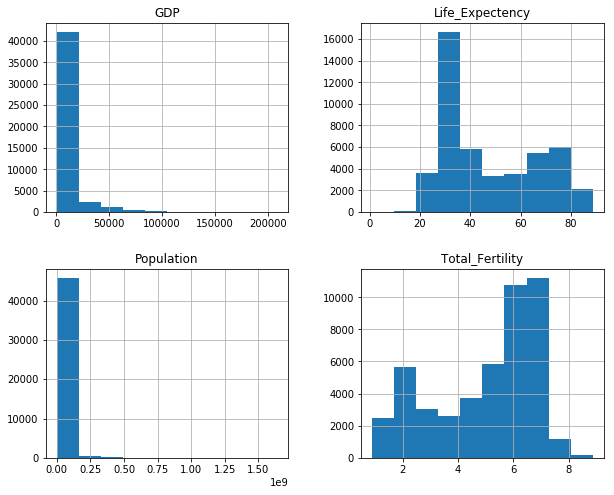

In [37]:
df_all_hist = df_all.drop(columns = ['country', 'Years'])
df_all_hist.hist(figsize=(10,8));

**These histograms give a general overview of the data we have; we can see that the majority has a GDP/capita less than 25000 and only very few countries have a population over 0.15 billion. The highest count of life expectency is at 30 years and total fertility is greatly skewed to the left with 7 being the most present fertility rate.**

In [21]:
df_all.GDP = df_all.GDP.astype(float)
df_all.Population = df_all.Population.astype(float)

df_all.dtypes

country             object
Years               object
Population         float64
Total_Fertility    float64
GDP                float64
Life_Expectency    float64
dtype: object

>***Grouping some countries into their regions***

In [22]:
west_europe_countries = ['Germany', 'France', 'Switzerland', 'Belgium', 'Netherlands', 'Spain', 'Norway', 'Sweden', 'Luxembourg']
middle_east_countries = ['Palestine', 'Egypt','Cyprus', 'Lebanon', 'Syria', 'Iraq', 'Iran','Jordan', 'Saudi Arabia', 'Kuwait', 'Qatar', 'Bahrain', 'United Arab Emirates', 'Oman', 'Yemen']
south_asia_countries = ['Afghanistan','Bangladesh','Bhutan','India','Iran','Maldives','Nepal','Pakistan','Sri Lanka', 'Cambodia', 'Indonesia', ]
east_asia_countries = ['China','Hong Kong, China','Japan','Macau','Mongolia','North Korea','South Korea','Taiwan']

East_Asia = df_all.query("country == @east_asia_countries").groupby('Years').mean()
South_Asia = df_all.query("country == @south_asia_countries").groupby('Years').mean()
Middle_East = df_all.query("country == @middle_east_countries").groupby('Years').mean()
Western_Europe = df_all.query("country == @west_europe_countries").groupby('Years').mean()

East_Asia.head()

,Population,Total_Fertility,GDP,Life_Expectency
Years,,,,
1800,5.347857e+07,5.560000,968.714286,30.742857
1801,5.377871e+07,5.564286,968.714286,30.742857
1802,5.395029e+07,5.568571,968.571429,30.742857
1803,5.425043e+07,5.572857,970.000000,30.742857
1804,5.442200e+07,5.577143,971.428571,30.742857


>***Creating a scaled copy of each region*** - so that the metrics can be plotted on the same y-axis in Research Question 4

In [34]:
sc = MinMaxScaler()
Middle_East_sc = pd.DataFrame(sc.fit_transform(pd.DataFrame(Middle_East)),columns=df_names_list)
South_Asia_sc = pd.DataFrame(sc.fit_transform(pd.DataFrame(South_Asia)),columns=df_names_list)
East_Asia_sc = pd.DataFrame(sc.fit_transform(pd.DataFrame(East_Asia)),columns=df_names_list)
Western_Europe_sc = pd.DataFrame(sc.fit_transform(pd.DataFrame(Western_Europe)),columns=df_names_list)

regions_scaled = [Middle_East_sc, South_Asia_sc, East_Asia_sc, Western_Europe_sc]
Western_Europe_sc.head()

,Population,Total_Fertility,GDP,Life_Expectency
0,0.000000,0.968030,0.002011,0.031940
1,0.002227,0.964249,0.001891,0.042658
2,0.005059,0.964249,0.002263,0.051018
3,0.007286,0.970780,0.002142,0.043730
4,0.009573,0.961843,0.002306,0.043730


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (How is income related to population?)

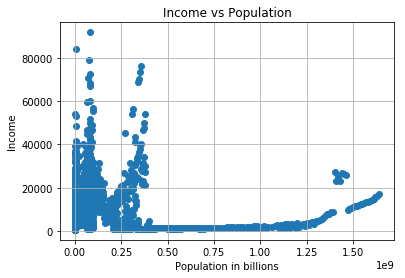

In [24]:
pop_vs_gdp = df_all.groupby('Population').mean()
#pop_vs_gdp.reset_index(inplace=True)
plt.scatter(pop_vs_gdp.index, pop_vs_gdp.GDP);
plt.title('Income vs Population')
plt.ylabel('Income')
plt.xlabel('Population in billions');
plt.grid();

<a id='conclusion 1'></a>
### Conclusion 1 
>**The first graph doesn't show a continuous trend between Population and Income, but it is shown that the highest GDP/Capita were found in the areas with lower population.**

### Research Question 2  (How is life expectency related to income?)

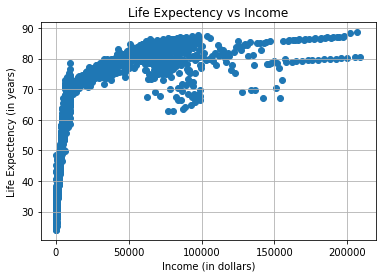

In [25]:
gdp_vs_exp = df_all.groupby('GDP').mean()
plt.scatter(gdp_vs_exp.index, gdp_vs_exp.Life_Expectency);
plt.title('Life Expectency vs Income')
plt.ylabel('Life Expectency (in years)')
plt.xlabel('Income (in dollars)')
plt.grid();

<a id='conclusion 2'></a>
### Conclusion 2
>**The graph shows that until about 20,000 dollars income, life expectancy increases at a very significant rate (very steep slope). It levels off after that, but it can still be observed that no life expectancy is less than about 80 years starting from about 150000 dollars income and upwards.**

### Research Question 3 (How do the chosen regions compare on each indicator?)

**Let's first see the mean value of each metric for every reagion.**

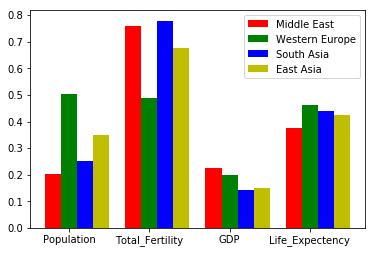

In [51]:
y_middle_east = [Middle_East_sc.Population.mean(), Middle_East_sc.Total_Fertility.mean(), Middle_East_sc.GDP.mean(), Middle_East_sc.Life_Expectency.mean()]
y_western_europe = [Western_Europe_sc.Population.mean(), Western_Europe_sc.Total_Fertility.mean(), Western_Europe_sc.GDP.mean(), Western_Europe_sc.Life_Expectency.mean()]
y_south_asia = [South_Asia_sc.Population.mean(), South_Asia_sc.Total_Fertility.mean(), South_Asia_sc.GDP.mean(), South_Asia_sc.Life_Expectency.mean()]
y_east_asia = [East_Asia_sc.Population.mean(), East_Asia_sc.Total_Fertility.mean(), East_Asia_sc.GDP.mean(), East_Asia_sc.Life_Expectency.mean()]
#plt.xticks([1, 2, 3, 4], df_names_list)
ind = np.arange(4)
width=0.2

plt.bar(ind, height = y_middle_east, width=0.2, label='Middle East', color='r')
plt.bar(ind+width, height = y_western_europe, width=0.2, label='Western Europe', color='g')
plt.bar(ind+width*2, height = y_south_asia, width=0.2, label='South Asia', color='b')
plt.bar(ind+width*3, height = y_east_asia, width=0.2, label='East Asia', color='y')
plt.xticks(ind+width, df_names_list)
plt.legend();
plt.show();

**Now let's check the information in more detail and observe how each metric changes over the years**

In [56]:
regions_names = ['East Asia', 'South Asia', 'Middle East', 'Western Europe']
colors = ['r', 'b', 'g', 'y']
regions_df = [East_Asia, South_Asia, Middle_East, Western_Europe]

#                   ---- already defined above ----

#df_names_list = ['Population', 'Total_Fertility', 'GDP', 'Life_Expectency']

def regions_on_indicator (df, indicator, names, colors):
    for i in range(len(colors)):
        plt.plot(df[i].index, df[i][indicator], colors[i], label= names[i])
        x_ticks = [0,50, 100, 150, 200, 250]
        x_labels = [1800,1850, 1900, 1950, 2000, 2050]
        plt.xticks(x_ticks, x_labels);
        plt.xlabel('Years')
        plt.ylabel(indicator.replace('_', ' '))
        plt.title('{} over the years'.format(indicator.replace('_', ' ')))
        plt.legend();

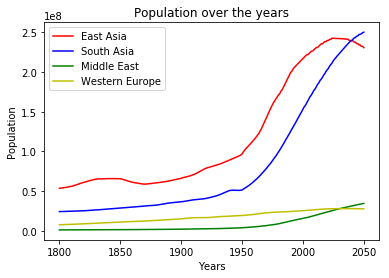

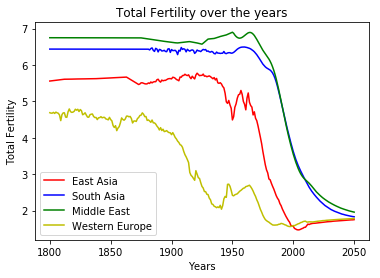

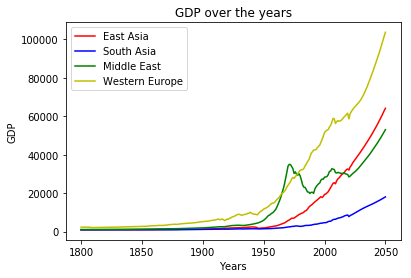

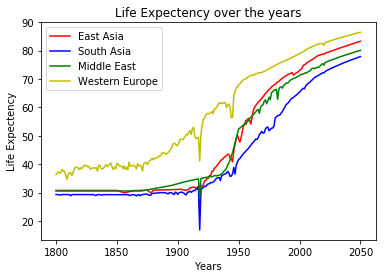

In [57]:
for i in range(len(df_names_list)):
    regions_on_indicator (regions_df, df_names_list[i], regions_names, colors)
    plt.show();

<a id='conclusion 3'></a>
### Conclusion 3
>**Population is the most metric where there is a significant difference between the regions. As shown, East and South Asia's population escalated rappidly at around 1850 while the other two regions continues in their slow, gradual increase. The regions follow the same trend for the other three metrics. It can be noted that Western Europe has the lowest total fertility rate (which started to decline much earlier than the other regions) and the highest increase in GDP.**

### Research Question 4 (How do the metrics compare for each region?)

In [58]:
def indicators_on_region (df, indicator, names, colors):
    for i in range(len(colors)):
        plt.plot(df.index, df[indicator[i]], colors[i], label=indicator[i])
        x_ticks = [0,50, 100, 150, 200, 250]
        x_labels = [1800,1850, 1900, 1950, 2000, 2050]
        plt.xticks(x_ticks, x_labels);
        plt.title (names)
        plt.xlabel('Years')
        plt.ylabel('Scaled Axis')
        plt.legend()
    

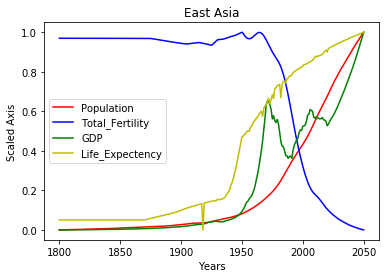

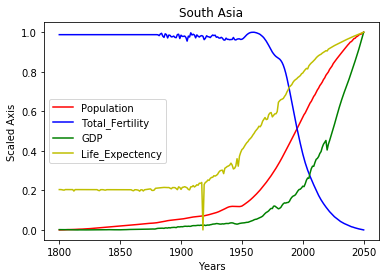

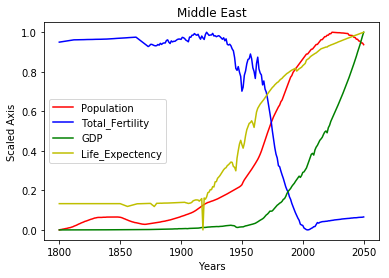

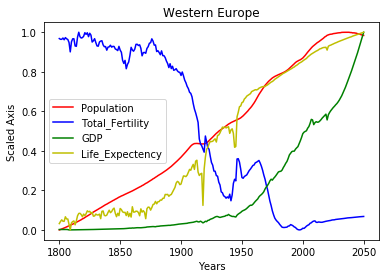

In [59]:
for i in range(len(colors)):
    indicators_on_region(regions_scaled[i], df_names_list, regions_names[i], colors)
    plt.show()

<a id='conclusion 4'></a>
### Conclusion 4
>**The graphs show an overall trend between the indicators across each region; as life expectency, population and GDP increase, total fertility decreases. The rate at which this happens differs from region to region, and so does the presence of abrubt pikes throughout. A noticeable difference is that total fertility in Western Europe started its steep decline at about the year 1870 unlike the other regions (at about 1960)**

<a id='conclusions'></a>
## Limitations
> **Taking life expectancy and total GDP as the 'success' metrics, it appears that Western Europe is the best. It is worth noting, however, that outliers were not taken into consideration. The high performance observed might be due to a few exceptional stand-alone points while the majority of the region is not being represented accurately.**
**Moreover, data for the years 2023 onward are only an estimation of what is yet to happen.**

## Submitting your Project 

In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0